<div style="margin: 0 auto 30px; height: 60px; border: 2px solid gray; border-radius: 6px;">
  <div style="float: left;"><img src="img/epfl.png" /></div>
  <div style="float: right; margin: 20px 30px 0; font-size: 10pt; font-weight: bold;"><a href="https://moodle.epfl.ch/course/view.php?id=18253">COM202 - Signal Processing</a></div>
</div>
<div style="clear: both; font-size: 30pt; font-weight: bold; color: #483D8B;">
    Lab 3: Cooking with Sinusoids
</div>

In this notebook, we look at another possible signal representation, directed towards frequency. We begin by plotting simple functions, and then move to understanding the concept of Fourier Transforms intuitively. By the end of the lab, you should get a first understanding of what Fourier transforms are used for, and of interesting properties they hold.
<div style="text-align:center">
<img src="https://64.media.tumblr.com/159a347844ee5f19c1a1ce4910b5208d/tumblr_nlkkg4zQFP1rwfctbo2_500.gifv" width=800 height=800>
</div>

First, some bookkeeping: if you need to install ipywidgets (or enable it if it does not show up)

- `pip install ipywidgets` 
- `jupyter nbextension enable --py widgetsnbextension`

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import IPython
from IPython.display import display

In [2]:
plt.rcParams["figure.figsize"] = (12,4)

# A dash of cosine, a sprinkle of sine, and just the right amount of amplitude!

In this first part of the notebook, let's play a bit with simple sinusoidal functions, the type you have alredy encountered in your previous math classes. Since we are talking about functions of a real variable, of course we will only be able to compute their values (and plot them) for a finite set of points but, in principle, we can use as fine a resolution as allowed by NumPy's numerical precision.

## Frequency and amplitude

Consider the trigonometric function $A\sin(2\pi f t)$, where $t$ indicates time (in seconds); the parameters are
 * the frequency $f$, measured in hertz (Hz) that indicates the number of periods per second of the oscillations
 * the amplitude $A$

### Exercise: your sine function

Complete the function prototype below so that, for a given frequency ``f`` (in Hz) and an array of time instants ``t`` (in seconds), it returns an array where each element is $\sin(2\pi f t)$ 

In [22]:
def sine(f, t):
    t = np.array(t)
    return np.sin(2 * np.pi * t * f)

Let's check that it works by plotting its values for a frequency of 1 Hz over $T$ seconds. Since, as we said, we can only compute the function over a discrete set of points, we will use the function ``linspace'' to create a uniformly-spaced set of time values between 0 and $T$:

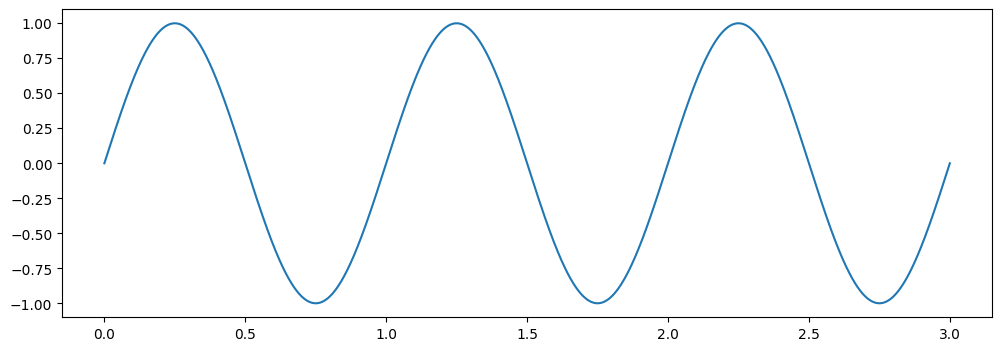

In [32]:
T = 3    # seconds
S = 1000 # number of data points per second
t = np.linspace(0, T, T * S)
f = 1
plt.plot(t, sine(f, t));

Now try to answer the following questions:
 * what is the _period_ of the sinusoid we just plotted?
=> Answer:1
 * what is its _amplitude_?
=> Answer:1

### Exercise: from smooth to jagged

Using a lot of points per second produces a very smooth plot that recalls a truly continous-time function. But what happens if you progressively reduce the density of points per second? Can you explain why the plots look like they do?

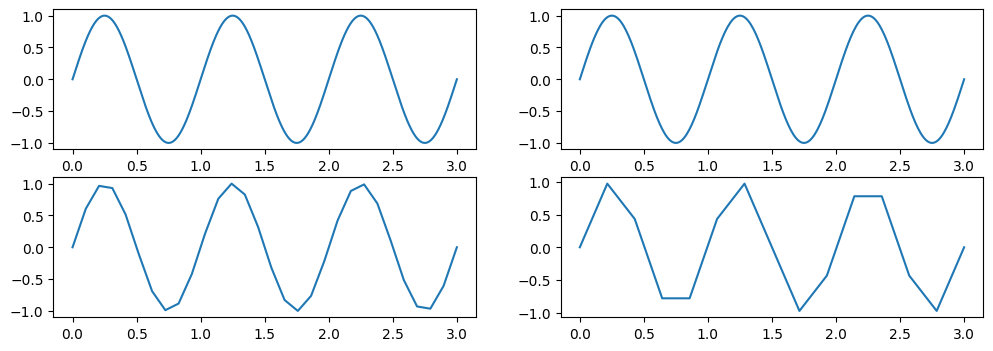

In [33]:
for n, S in enumerate([1000, 100, 10, 5]):
    plt.subplot(2, 2, n+1)
    t = np.linspace(0, T, T * S)
    plt.plot(t, sine(f, t));

## Mixing sinusoids together

The surprising thing about sinusoidal oscillations is that they can be combined to produce virtually any curve in time. Let's try. 

### Exercise: a few side dishes

Implement the following functions in the cells below:

- $y_1(f, t) = 2\sin(2\pi ft)$
- $y_2(f, t) = \sin(2\pi ft) + \sin(4\pi ft)$
- $y_3(f, t) = \frac{4}{\pi}\sin(2\pi ft) +  \frac{4}{3\pi}\sin(6\pi ft)$
- $y_4(f, t) = y_3(f, t) +  \frac{4}{5\pi}\sin(10\pi ft) + \frac{4}{7\pi}\sin(14\pi ft) + \frac{4}{9\pi}\sin(18\pi ft)$

In [48]:
def y1(f, t): 
    t = np.array(t)
    return 2*np.sin(2 * np.pi * t * f)

In [49]:
def y2(f, t): 
    t = np.array(t)
    return np.sin(2 * np.pi * t * f) + np.sin(4 * np.pi * t * f)

In [50]:
def y3(f, t): 
    t = np.array(t)
    return (4/np.pi) * np.sin(2 * np.pi * t * f) + (4/3*np.pi) * np.sin(6 * np.pi * t * f)

In [51]:
def y4(f, t):
    t = np.array(t)
    return y3(f,t) + (4/5*np.pi) * np.sin(10 * np.pi * t * f) + (4/7*np.pi) * np.sin(14 * np.pi * t * f) + (4/9*np.pi) * np.sin(18 * np.pi * t * f)

Now let's plot the result but try to think of what the plots may look like before you run the next cell...

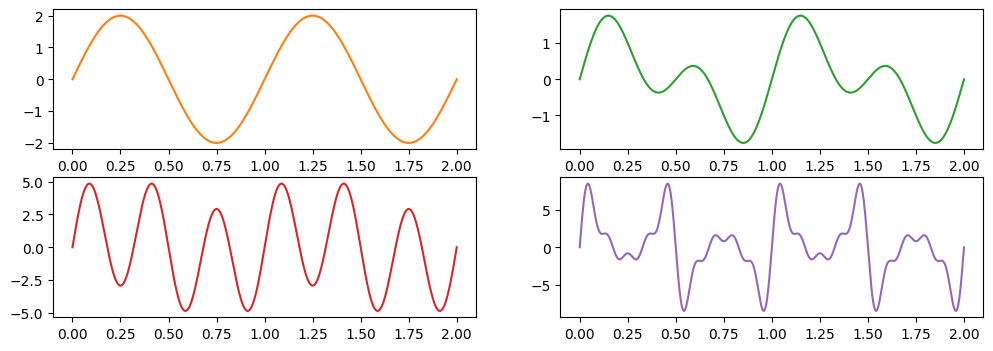

In [52]:
T = 2    # seconds
S = 1000 # number of data points per second
t = np.linspace(0, T, T * S)

for n in range(1, 5):
    plt.subplot(2, 2, n)
    plt.plot(t, eval(f'y{n}(f, t)'), f'C{n}')


<div style="text-align:center">
<img src="https://media.giphy.com/media/5Wyv8urxxclm8/giphy.gif" width=500 height=500>
</div>

## A more exotic ingredient

Now that you have had a first example of how we can create different functions by summing sinusoids, let us get a bit more technical. Remember Euler's equality:

$$
    \sin(2 \pi ft) = \frac{e^{j 2 \pi f t} - e^{-j 2 \pi f t}}{2j}
$$

Similar to cooking, where *fresh* ingredients make all the difference instead of using *pre-made* dishes, we can break down each of our sinusoids even further to use the raw and flavorful complex exponentials! By switching to complex exponentials, we can cook up complex signals with even more freedom and creativity in our signal kitchen! 

For instance, consider the function $y_4(f, t)$ that you just defined; you have certainly recognized that it produces an approximation to a square wave. The original recipe was (using pre-made ingredients):

- $\frac{4}{\pi}$ of a  sine with frequency $f$
- $\frac{4}{3\pi}$ of a sine with frequency $3f$
- ...

Using complex exponentials we have:
- $\frac{4}{\pi}$ of a complex exponential with frequency $f$ 
- $\frac{4}{\pi}$ of a complex exponential with frequency $-f$
- $\frac{4}{3\pi}$ of a complex exponential with frequency $3f$ 
- $\frac{4}{3\pi}$ of a complex exponential with frequency $-3f$
- ...

### Complex numbers are easy in Python

Let's rewrite $y_4(f, t)$ and plot the result:

In [53]:
def y4_ce(f, t):
    return 4 * np.sum([np.exp(2j * np.pi * k * f * t) / (2j * k) for k in range(-9, 10, 2)], axis=0) / np.pi 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


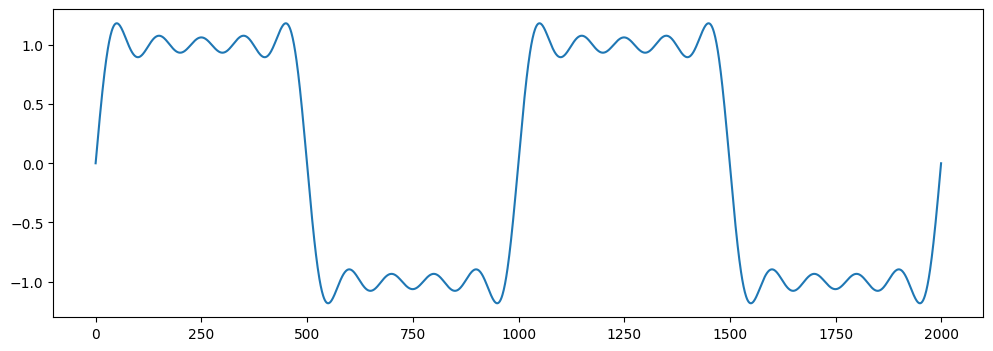

In [54]:
plt.plot(y4_ce(f, t));

Oh no, why the warning? Well, in theory the imaginary part of the sum of complex exponentials should cancel out; but, because of slight numerical imprecisions, the cancellation is not perfect and a small amount remains:

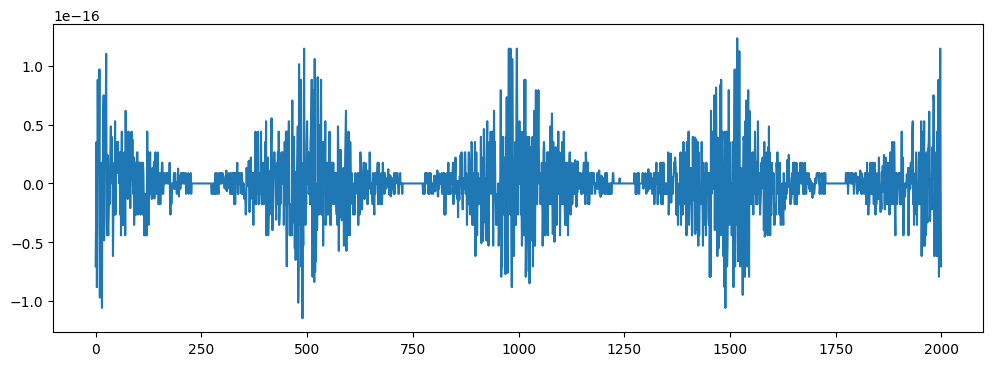

In [55]:
plt.plot(np.imag(y4_ce(f, t)));

We can fix that by discarding the imaginary part:

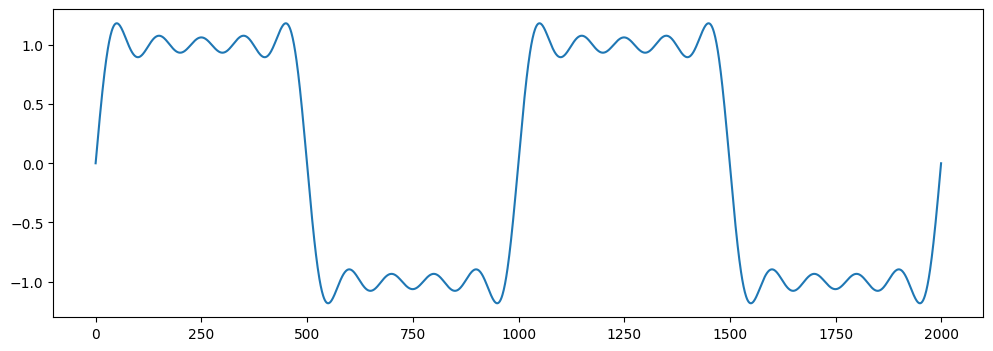

In [56]:
plt.plot(np.real(y4_ce(f, t)));

## The list of ingredients

We will return to cooking in a second but, if we wanted to represent this function by showing how much of each complex exponential we have used, we could plot the amounts like so:

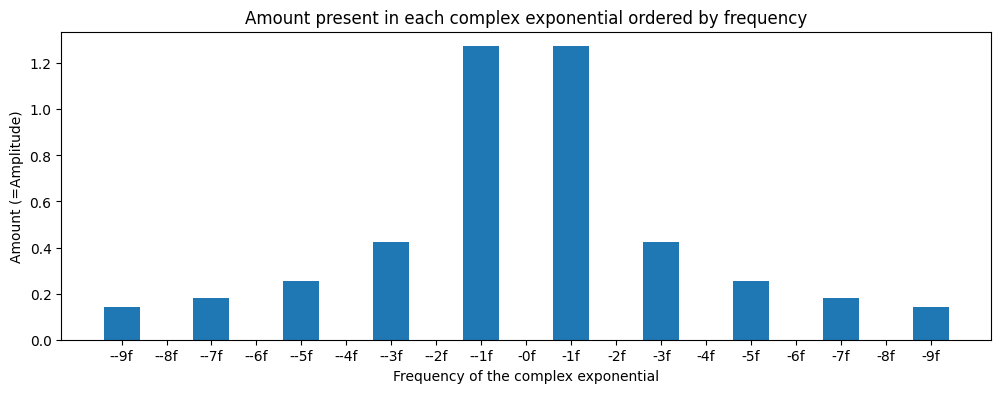

In [57]:
frequency = [ f'-{k}f' for k in range(-9, 10) ]
magnitude = [ 0 if (k % 2) == 0 else np.abs(4 / (k * np.pi)) (-9, 10) ]

plt.bar(frequency, magnitude)
plt.title('Amount present in each complex exponential ordered by frequency')
plt.xlabel('Frequency of the complex exponential')
plt.ylabel('Amount (=Amplitude)')
plt.show()

What we have here is in essence the Fourier transform of the signal. In the next section we will derive the result in detail but, for the moment, you can compare the plot we just drew to the actual Fourier transform coefficients of an actual square wave:

/var/folders/nm/0hfsx7zn6zv2n4jggw8wc0g80000gn/T/ipykernel_98848/3769839492.py:11: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(np.abs(np.fft.fftshift(np.fft.fft(y))[980:1021]), use_line_collection=True);


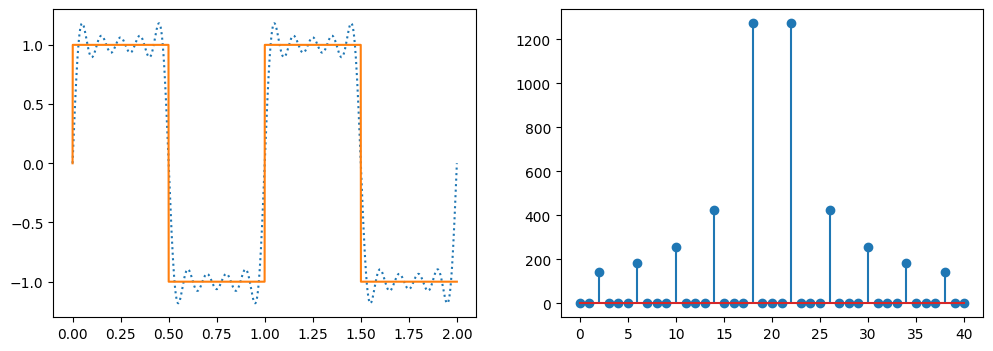

In [59]:
# our approximation
y = np.real(y4_ce(f, t))
# a "true" square wave
x = np.sign(y)

plt.subplot(1, 2, 1)
plt.plot(t, y, ':')
plt.plot(t, x)

plt.subplot(1, 2, 2)
plt.stem(np.abs(np.fft.fftshift(np.fft.fft(y))[980:1021]), use_line_collection=True);

Very similar to our bar plot isn't it? 

# A whole new cooking technique: the change of basis!

Let us recap what we have done so far: we can represent a signal as a function of _frequency_ (rather than of time) by measuring *how much of a complex exponential at a given frequency is contained in the signal*. 

When we represent the signal as in our bar plot, we say that we are in the **frequency domain**. When we represent the signal over time, as we usually do, then we are in the **time domain**. 

We can easily go from the frequency domain (bar plot) to the time domain by *summing up the different complex exponentials* with their corresponding coefficients. **But how do we get from the time domain to the frequency domain?**

## Moving to discrete time

So far, we have used "simulated" continuous-time functions but, since we are using a digital computer, in the end everything we compute is discrete in nature. We will therefore move explicitly in discrete time, where "time" is no longer measured in seconds but it has no dimension, and where frequencies are measured in radians. 

### Exercise: discrete-time oscillations

As we have seen in class, discrete-time complex exponentials are sequences of the form

$$
    x[n] = e^{j\omega n}, \qquad -\pi \leq \omega < \pi
$$

Complete the following function to return the sequence $e^{jwn}$ for an input array of indexes ``n``:

In [86]:
def cexp(w, n):
    print(n)
    for i in range(100):
        n[i] = np.exp(1j * n[i] * w)
    print(n)

Let's check that it works; if it does, you should get the same cosine shape in both plots

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
[ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0]


/var/folders/nm/0hfsx7zn6zv2n4jggw8wc0g80000gn/T/ipykernel_98848/2646976171.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  n[i] = np.exp(1j * n[i] * w)


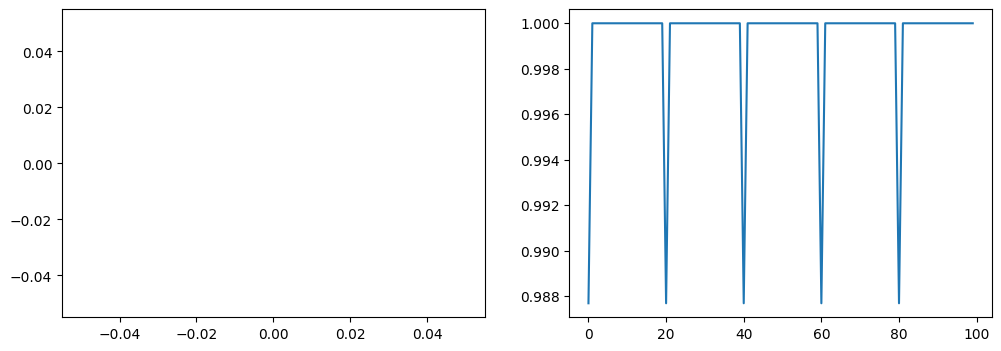

In [87]:
w = np.pi / 20
n = np.arange(0, 100)
plt.subplot(1, 2, 1)
plt.plot(np.real(cexp(w, n)))
plt.subplot(1, 2, 2)
plt.plot(np.cos(w * n));

## Linear algebra for signals

We can use discrete-time signals just like we use Euclidean vectors in linear algebra (if you think about it, both are just a collection of values!). 

From the previous lab, remember that given a basis of N vectors $\{\mathbf{w}_k \}_{k=0, 1, ..., N-1}$ we can write any vector as $\mathbf{x} = \sum^{N-1}_{k=0} \alpha_k \mathbf{w}_k$. When we describe a singnal in the time domain we are implicitly using the canonical basis $\{\mathbf{e}_k \}_{k=0, 1, ..., N-1}$ where the $n$-th element of basis vector number $k$ is
$$
    \mathbf{e}_k[n] = \begin{cases} 1 & n = k \\ 0 & n \neq k \end{cases}.
$$

The new basis we will consider is the **Fourier basis** for complex-valued vectors of length $N$, in which the $n$-th element of basis vector number $k$ is 
$$
    \mathbf{w}_k[n] = e^{j\frac{2 \pi}{N} nk}.
$$

For now, we will just admit that this base is orthogonal (you will see all the details in class, but let us focus on interpretation for now). 

## The inverse Fourier transform

Maybe you noticed something: our Fourier oscillatory basis vectors closely resemble something we have just used... Do you see it yet?

<div style="text-align:center">
<img src="https://media.giphy.com/media/nJ2PObJA3EVgc/giphy.gif" width="500" height="500">
</div>

Indeed, the Fourier basis vectors corresponds to the basic ingredients that we used in our cooking recipe to go from the **frequency domain** to the **time domain**! 

In fact this gives us our first formula: the **Inverse Fourier Transform**

$$
    x[n] = \frac{1}{N} \sum^{N-1}_{k=0} X[k] e^{j \frac{2 \pi}{N} nk}, \qquad n= 0 , 1, ..., N-1
$$

where $x[n]$ is our signal in the time domain, and $X[k]$ is the set of "weights" in the frequency domain. 

## But what about the actual Fourier transform? 

If the inverse transform brings us from the Fourier basis to the time domain, the direct transform does the opposite, it changes the basis from the canonical time domain basis to the Fourier basis. As you have seen in class this translates to 

$$
  X[k] = \sum^{N-1}_{n=0} x[n] e^{-j \frac{2\pi}{N}nk}, \qquad k = 0, 1, ..., N-1
$$

### Exercise: write your own Fourier transform

Although NumPy provides you with a super fast implementation of the Fourier transform, it is useful (at least once in a lifetime) to write your own implementation, however inefficient

In [ ]:
def my_dft(x):
    pass

Let's verify if your implementation works:

In [ ]:
x = np.random.rand(100)
my_X = my_dft(x)
X = np.fft.fft(x)
print("you got it!" if np.allclose(X, my_X) else 'sorry, try again!')

# And now, the icing on the cake

Let us recap what we have seen so far: we have two spaces namely the frequency domain and the time domain to represent a function. Each domain has its own base, and we can represent a signal using a basis extension, just like we do for vectors! We can also go from one domain to another by changing basis. To go from time to frequency domain, we use the Fourier transform, and to go from frequency to time domain the inverse fourier transform. 

Now that you understand how we represent functions in the frequency domain, you can play with the interactive tool below: 
 * you can set the amplitude and frequency of up to 4 complex exponentials
 * the plot will display the real and imaginary parts of the sum of the exponentials as a blue line
 * you can choose to also display the individual components (dotted lines)
 
Note that, at the beginning, all exponentials except the first one are set to an amplitude of zero.

In [89]:
# since the code is a bit complicated and not at all relevant to the lab, it is included as a separate file
%run helpers/sandbox.py

### A few questions, for dessert:

- What happens when you increase the amplitude of the exponentials after the first? 
- What happens if you have two exponentials at frequencies of equal magnitude but opposite sign? Why is that the case? 

### And **voila**! You are now a Fourier transform chef!

<div style="text-align:center">
<img src="https://media.giphy.com/media/2s7lb48XP0yje/giphy.gif" width="600" height="600">
</div>
